# Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
#Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
data= pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df= data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**We have 7043 total rows and 21 columns.**


# Missing values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



---
No missing values


# **Data Cleaning**

In [6]:
df= df.drop(["customerID"],axis=1)

Now, we transform TotalCharges column to numeric as it should be

In [7]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64



---
11 indirect missing values appear. Why?


In [9]:
df[df.TotalCharges.isnull()==True].head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


In [10]:
data.iloc[[488]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No




---

**there were blanks as values!**.
We will eliminate those records to clean it



In [11]:
df.dropna(axis=0,how="any",inplace=True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



---


**Done.**




Let's check numeric

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


everything seems to be fine for now.


# **Data Visualization**

## Univariate EDA

Text(0.5, 1.0, 'Tenure (months)')

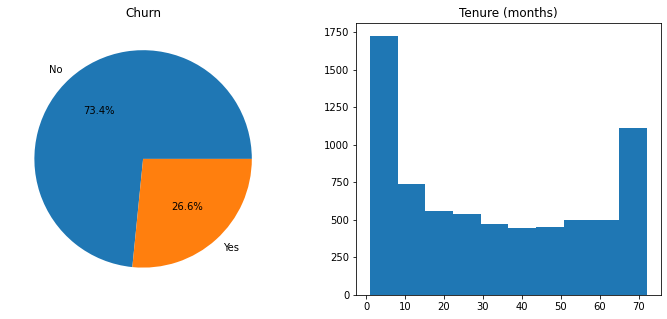

In [13]:
#Churn and tenure(Number of months the customer has stayed with the company)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5)) 
ax1.pie(df.Churn.value_counts(),autopct = '%1.1f%%',labels=["No","Yes"])
ax1.set_title('Churn')
ax2.hist(x="tenure",data=df)
ax2.set_title('Tenure (months)')



---







[Text(0.5, 1.0, 'TotalCharges')]

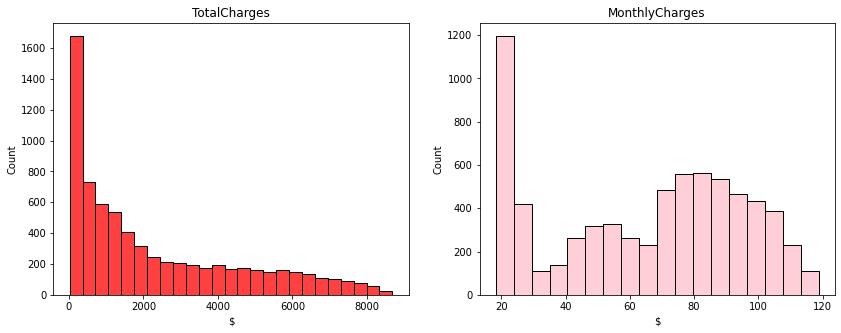

In [14]:
#Charges
fig, axes = plt.subplots(1,2,figsize=(14,5)) 
axes[1].set_xlabel("$")
sns.histplot(x="MonthlyCharges", data=df , ax=axes[1],color="pink").set(title="MonthlyCharges")
axes[0].set_xlabel("$")
sns.histplot(x="TotalCharges", data=df , ax=axes[0],color="r").set(title="TotalCharges")



---



**Demographic info about customers:**

Text(0.5, 1.0, 'Dependents')

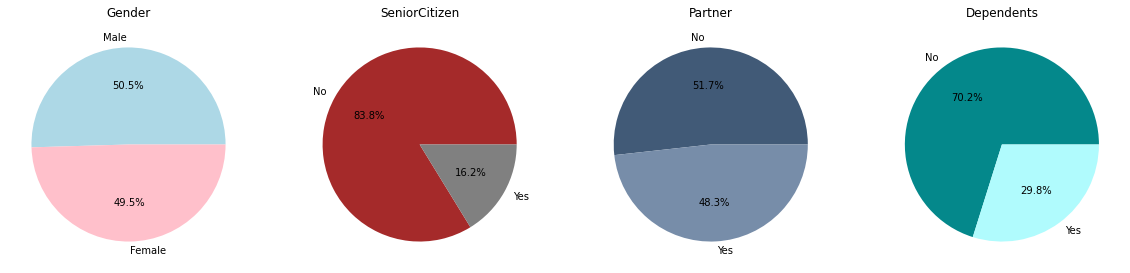

In [15]:
#Customers
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,20)) 
ax1.pie(df.gender.value_counts(),autopct = '%1.1f%%',labels=["Male","Female"],colors=["lightblue","pink"])
ax1.set_title('Gender')

ax2.pie(df.SeniorCitizen.value_counts(),autopct = '%1.1f%%',labels=["No","Yes"],colors=["brown","grey"])
ax2.set_title('SeniorCitizen')

ax3.pie(df.Partner.value_counts(),autopct = '%1.1f%%',labels=["No","Yes"],colors=["#415A77","#778DA9"])
ax3.set_title('Partner')

ax4.pie(df.Dependents.value_counts(),autopct = '%1.1f%%',labels=["No","Yes"],colors=["#04888B","#B0FBFD"])
ax4.set_title('Dependents')



---



**Phone Services that each customer has signed up for:**

Text(0.5, 1.0, 'MultipleLines')

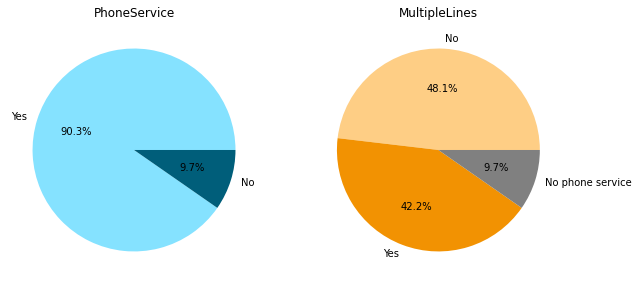

In [16]:
#Services per customer
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) 
ax1.pie(df.PhoneService.value_counts(),autopct = '%1.1f%%',labels=["Yes","No"],colors=["#85E2FF","#005E7A"])
ax1.set_title('PhoneService')

ax2.pie(df.MultipleLines.value_counts(),autopct = '%1.1f%%',labels=["No","Yes","No phone service"],colors=["#FECE85","#F29202","grey"])
ax2.set_title('MultipleLines')




---



**Internet Services that each customer has signed up for:**

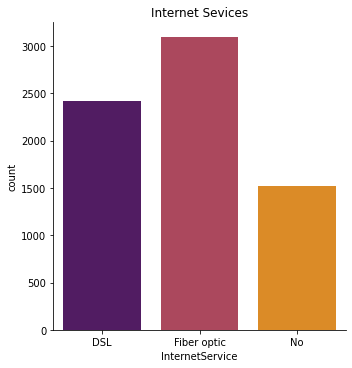

In [17]:
sns.catplot(x="InternetService",kind="count",data=df,palette="inferno").set(title="Internet Sevices")

Text(0.5, 1.0, 'TechSupport')

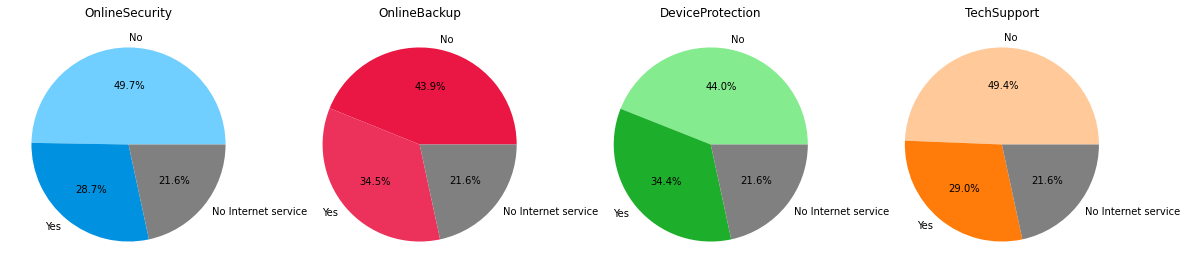

In [18]:
#Services per customer (cont.)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,20)) 
ax1.pie(df.OnlineSecurity.value_counts(),autopct = '%1.1f%%',labels=["No","Yes","No Internet service"],colors=["#70CFFF","#0092E0","grey"])
ax1.set_title('OnlineSecurity')

ax2.pie(df.OnlineBackup.value_counts(),autopct = '%1.1f%%',labels=["No","Yes","No Internet service"],colors=["#EA1744","#EC325A","grey"])
ax2.set_title('OnlineBackup')

ax3.pie(df.DeviceProtection.value_counts(),autopct = '%1.1f%%',labels=["No","Yes","No Internet service"],colors=["#84EB8E","#1DAF2B","grey"])
ax3.set_title('DeviceProtection')

ax4.pie(df.TechSupport.value_counts(),autopct = '%1.1f%%',labels=["No","Yes","No Internet service"],colors=["#FFC999","#FF7C0A","grey"])
ax4.set_title('TechSupport')



Text(0.5, 1.0, 'StreamingTV')

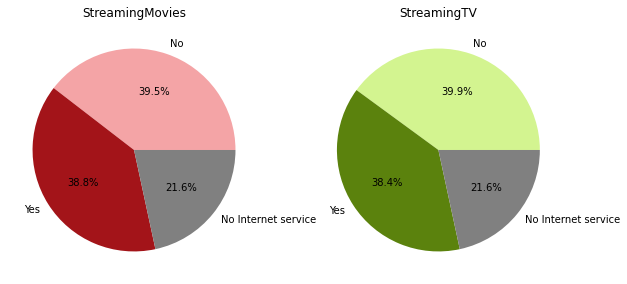

In [19]:
#Services per customer (cont.)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) 
ax1.pie(df.StreamingMovies.value_counts(),autopct = '%1.1f%%',labels=["No","Yes","No Internet service"],colors=["#F4A4A6","#A31419","grey"])
ax1.set_title('StreamingMovies')

ax2.pie(df.StreamingTV.value_counts(),autopct = '%1.1f%%',labels=["No","Yes","No Internet service"],colors=["#D3F490","#5B820D","grey"])
ax2.set_title('StreamingTV')



---



**Customer account information:**

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


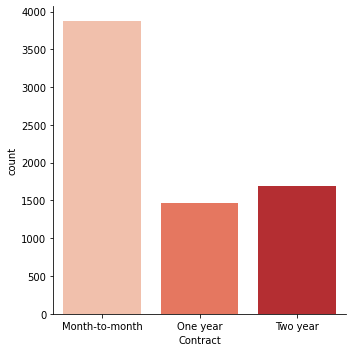

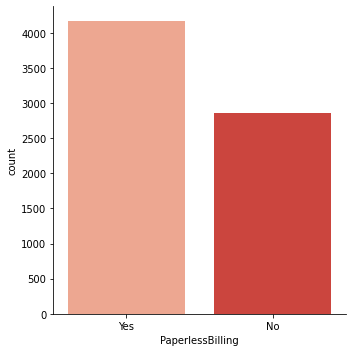

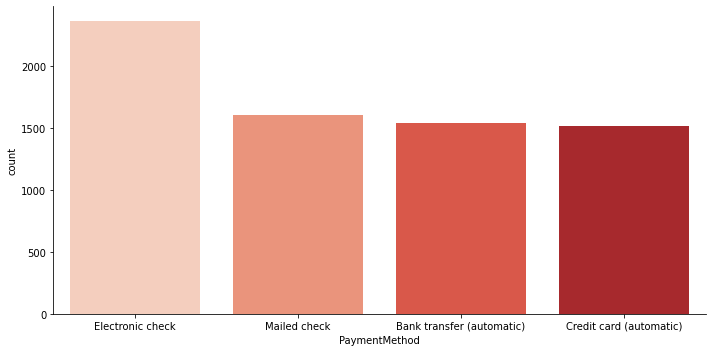

In [20]:
#Customer account information 
sns.catplot(x="Contract",kind="count",data=df,ax=ax1,palette="Reds")
sns.catplot(x="PaperlessBilling",kind="count",data=df,palette="Reds")
sns.catplot(x="PaymentMethod",kind="count",data=df,palette="Reds",aspect=2)


## Pairlplot

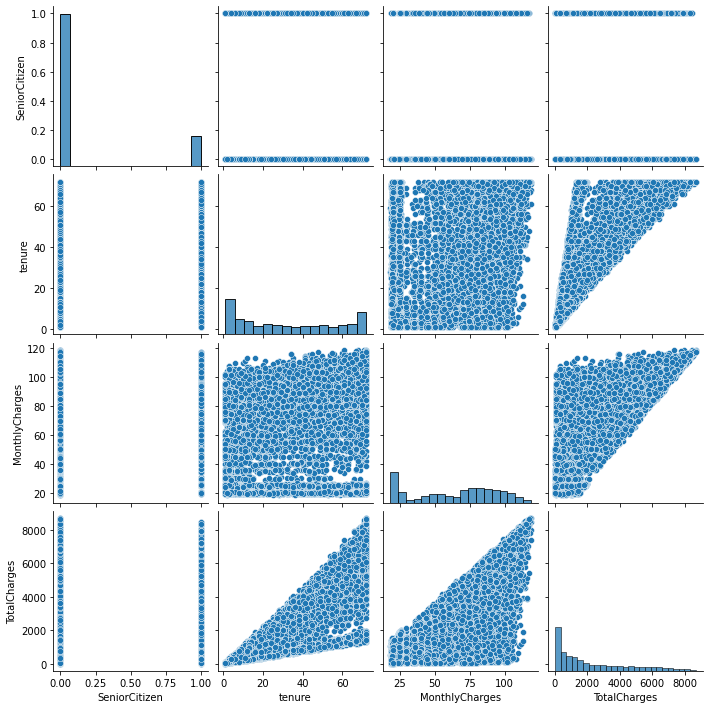

In [21]:
sns.pairplot(df)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

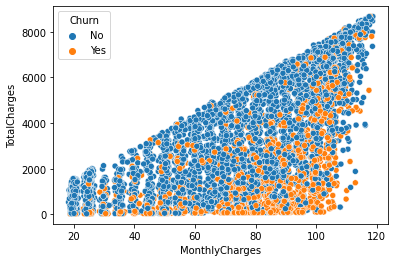

In [22]:
sns.scatterplot(x="MonthlyCharges",y="TotalCharges",hue="Churn",data=df)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

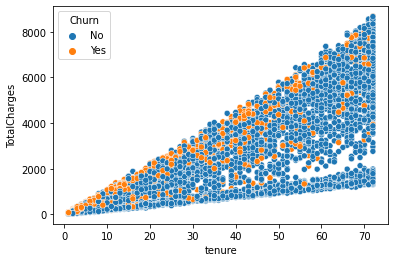

In [23]:
sns.scatterplot(x="tenure",y="TotalCharges",hue="Churn",data=df)

## EDA Churn

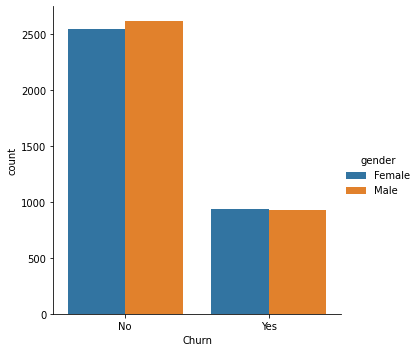

In [24]:
#gender
sns.catplot(x="Churn",kind="count",hue="gender",data=df)

**Dont seems to be a relationship between the client's sex and Churn**


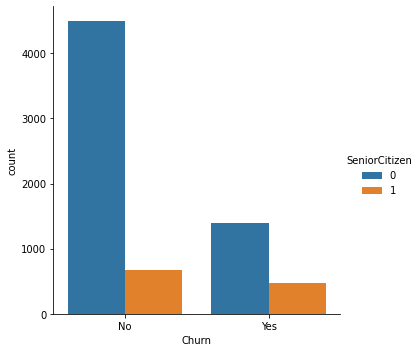

In [25]:
#Seniorcitizen
sns.catplot(x="Churn",kind="count",hue="SeniorCitizen",data=df)

Non-senior citizen clients have a greater chance of quitting, but we also know that the majority of clients are non-senior citizens.
On the other hand, more than half of senior citizens drop out.

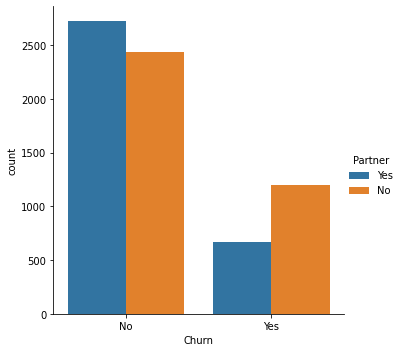

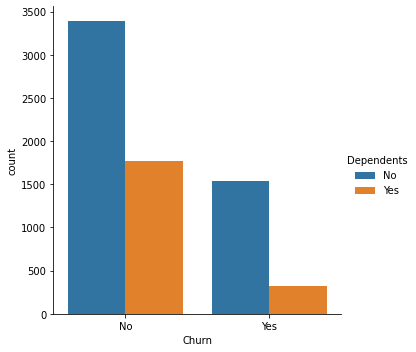

In [26]:
sns.catplot(x="Churn",kind="count",hue="Partner",data=df)
sns.catplot(x="Churn",kind="count",hue="Dependents",data=df)

Clients who do not have a partner are more likely to abandon, and there is also a tendency to abandon those who do not have dependents


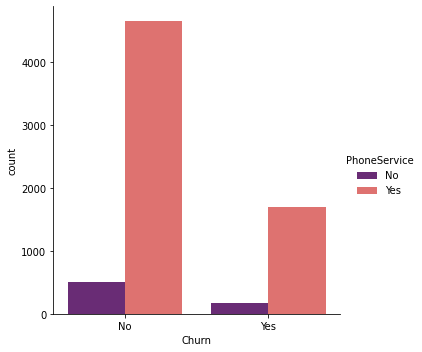

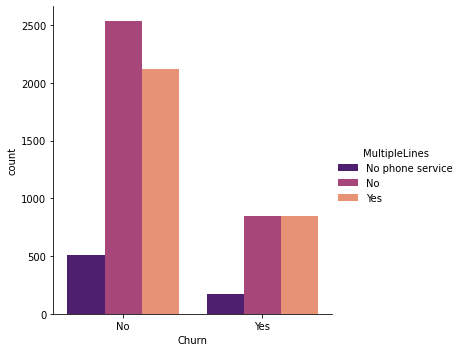

In [27]:
sns.catplot(x="Churn",kind="count",hue="PhoneService",data=df,palette="magma")
sns.catplot(x="Churn",kind="count",hue="MultipleLines",data=df,palette="magma")

There seem to be no relationships. Those who do not have telephone service almost never leave 

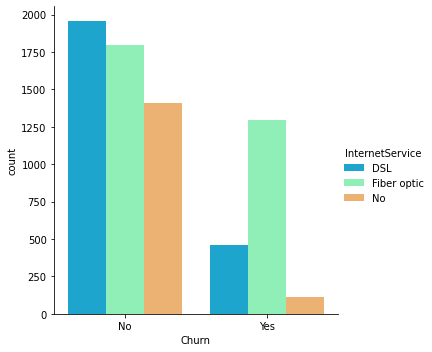

In [28]:
sns.catplot(x="Churn",kind="count",hue="InternetService",data=df,palette="rainbow")

Oh, customers who have fiber optic tend to quit frequently


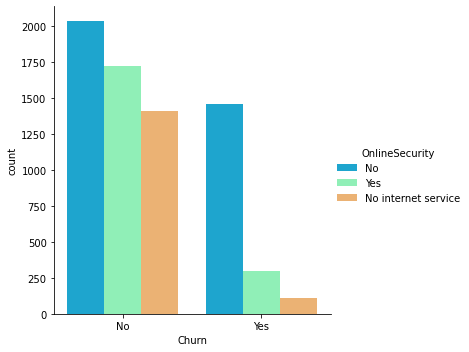

In [29]:
sns.catplot(x="Churn",kind="count",hue="OnlineSecurity",data=df,palette="rainbow")

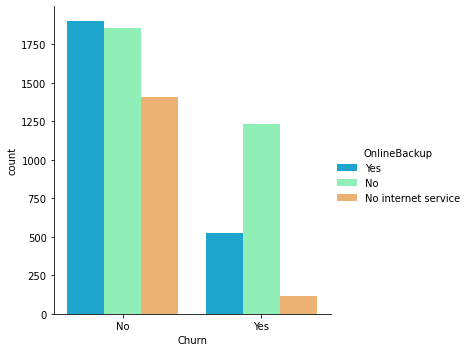

In [30]:
sns.catplot(x="Churn",kind="count",hue="OnlineBackup",data=df,palette="rainbow")

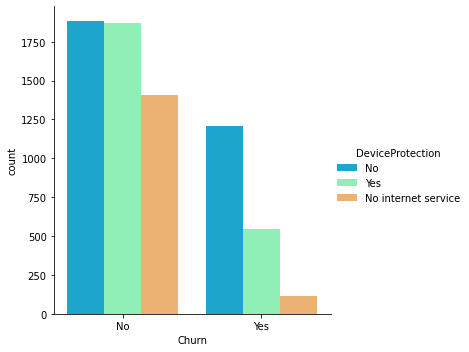

In [31]:
sns.catplot(x="Churn",kind="count",hue="DeviceProtection",data=df,palette="rainbow")

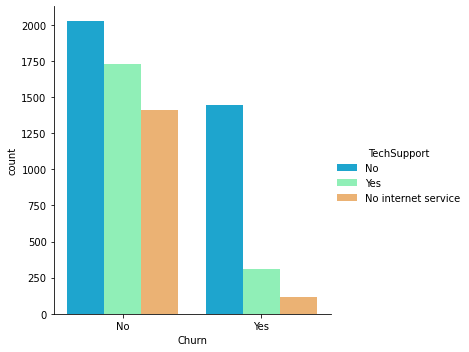

In [32]:
sns.catplot(x="Churn",kind="count",hue="TechSupport",data=df,palette="rainbow")

Observation: if you dont have any service like TechSupport or Online Security, you are more likely to abandon


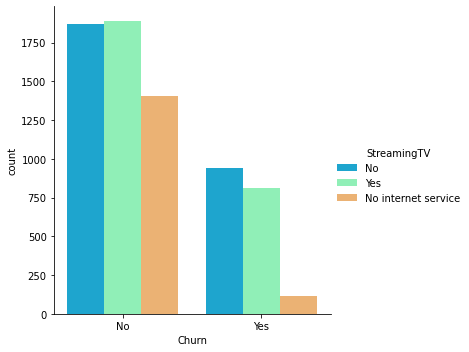

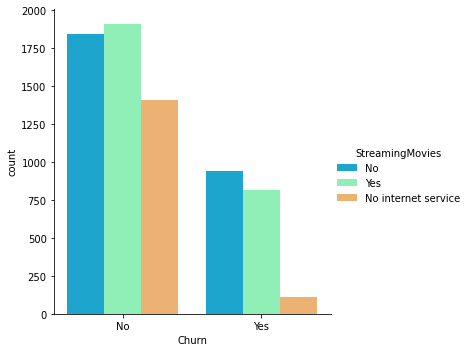

In [33]:
sns.catplot(x="Churn",kind="count",hue="StreamingTV",data=df,palette="rainbow")
sns.catplot(x="Churn",kind="count",hue="StreamingMovies",data=df,palette="rainbow")

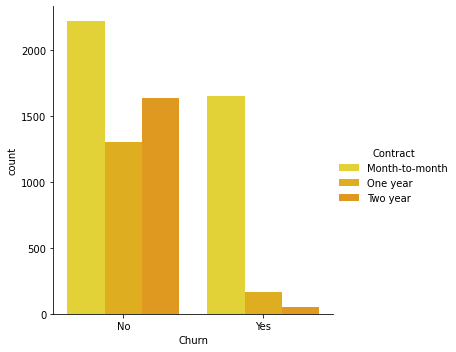

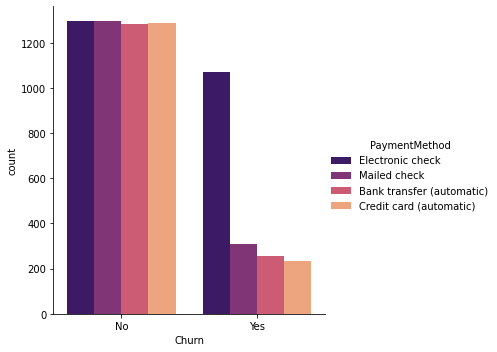

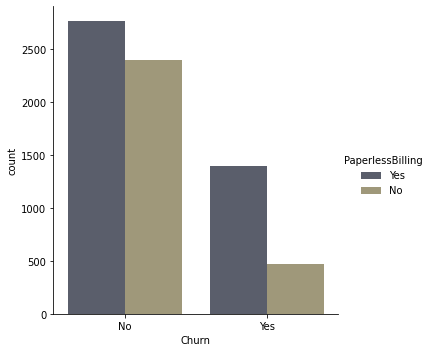

In [34]:
sns.catplot(x="Churn",kind="count",hue="Contract",data=df,palette="Wistia")
sns.catplot(x="Churn",kind="count",hue="PaymentMethod",data=df,palette="magma")
sns.catplot(x="Churn",kind="count",hue="PaperlessBilling",data=df,palette="cividis")

# **Data manipulation & encoding**

In [35]:
dft=pd.get_dummies(df)


In [36]:
dft

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [37]:
dft.drop(["gender_Male","Partner_No","Dependents_No","PhoneService_No","MultipleLines_No","InternetService_No","OnlineSecurity_Yes","OnlineBackup_Yes","DeviceProtection_Yes","TechSupport_Yes","StreamingTV_Yes","StreamingMovies_Yes","Contract_One year","PaperlessBilling_Yes","PaymentMethod_Credit card (automatic)","Churn_No"],axis=1,inplace=True)

In [38]:
dft

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,Contract_Month-to-month,Contract_Two year,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,0,34,56.95,1889.50,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,2,53.85,108.15,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,1
3,0,45,42.30,1840.75,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,0,2,70.70,151.65,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
7039,0,72,103.20,7362.90,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,346.45,1,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7041,1,4,74.40,306.60,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,1


# **Correlation**

<AxesSubplot:>

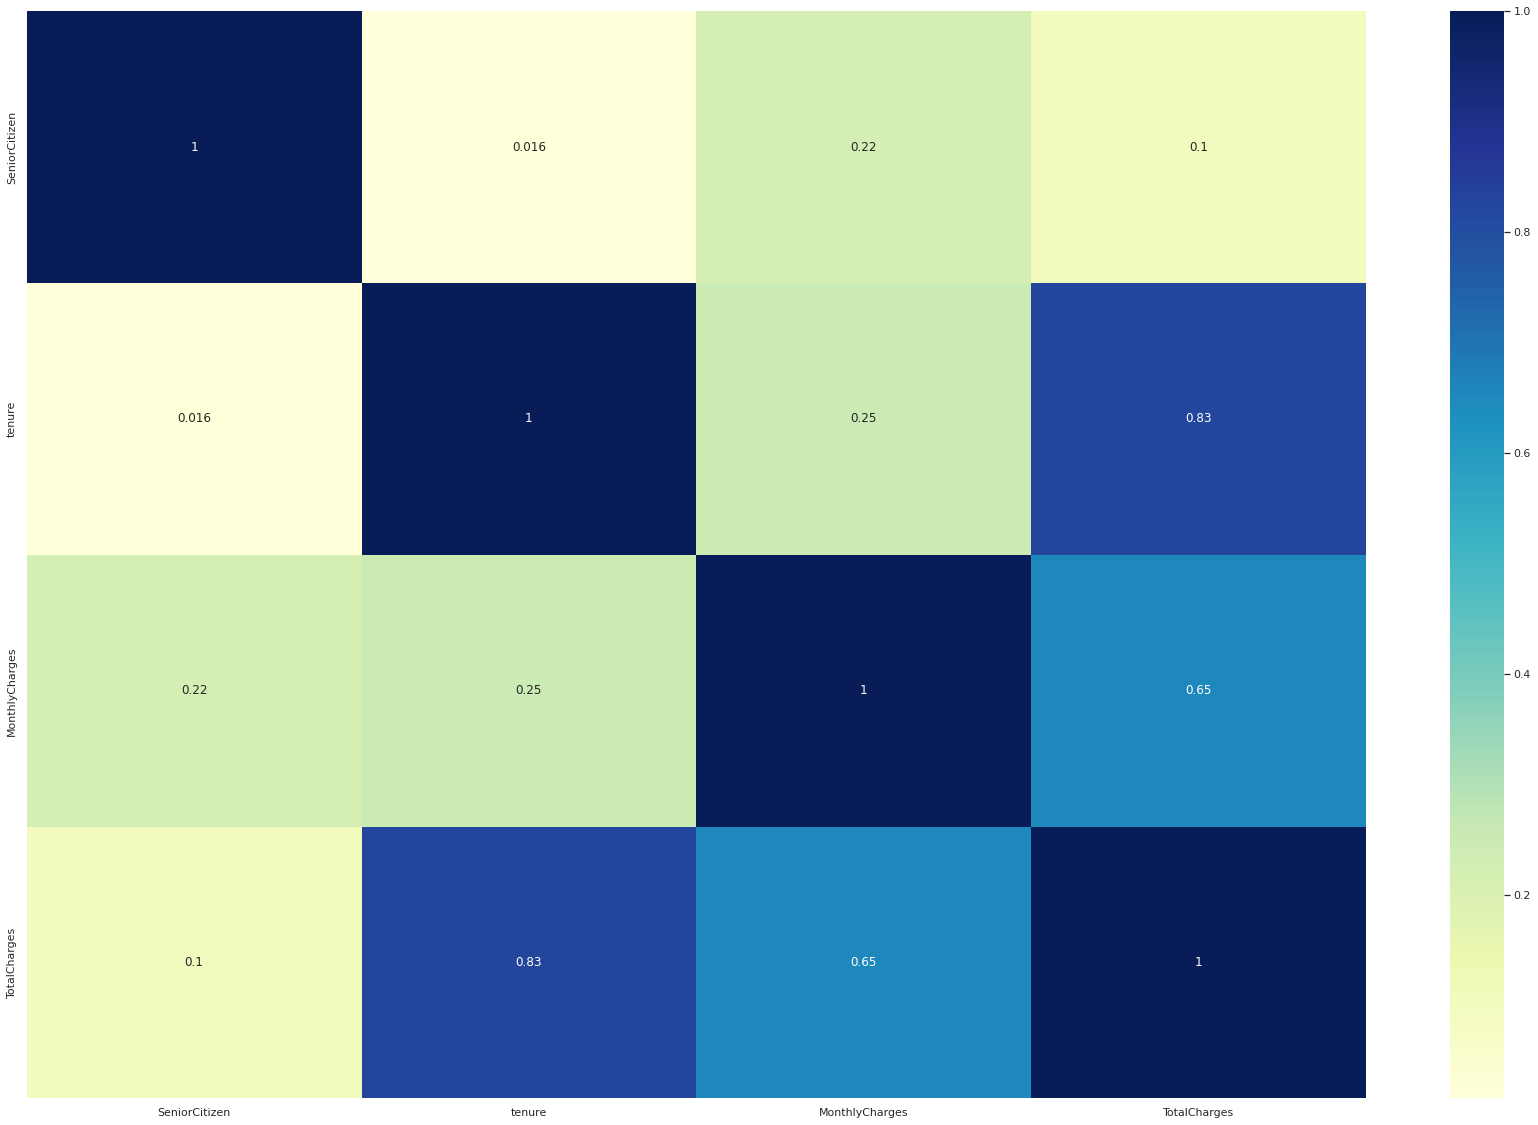

In [39]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [40]:
dft.corr()["Churn_Yes"]

SeniorCitizen                              0.150541
tenure                                    -0.354049
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
gender_Female                              0.008545
Partner_Yes                               -0.149982
Dependents_Yes                            -0.163128
PhoneService_Yes                           0.011691
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
OnlineSecurity_No                          0.342235
OnlineSecurity_No internet service        -0.227578
OnlineBackup_No                            0.267595
OnlineBackup_No internet service          -0.227578
DeviceProtection_No                        0.252056
DeviceProtection_No internet service      -0.227578
TechSupport_No                             0.336877
TechSupport_

<AxesSubplot:>

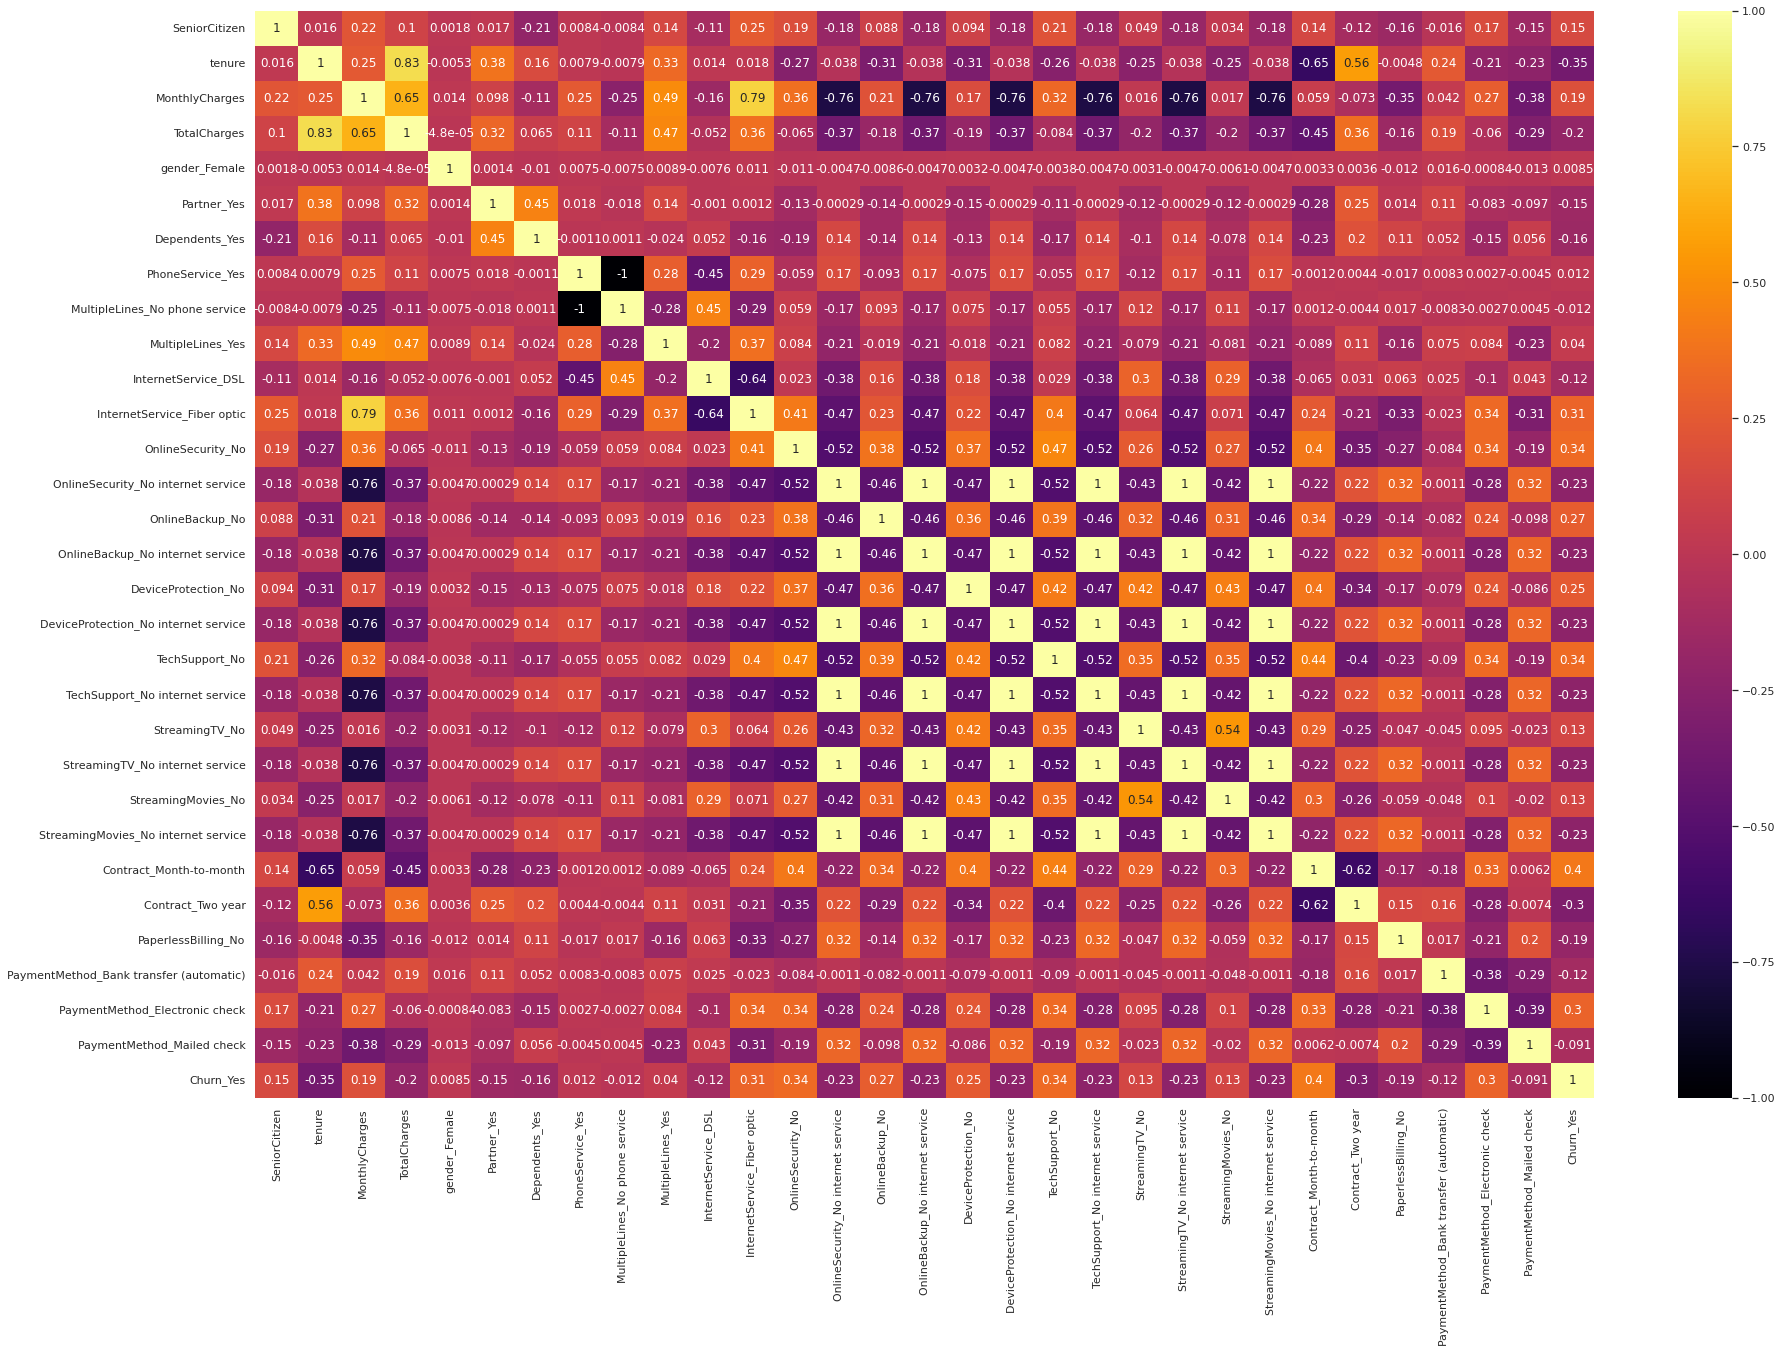

In [41]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(dft.corr(),annot=True,cmap="inferno")

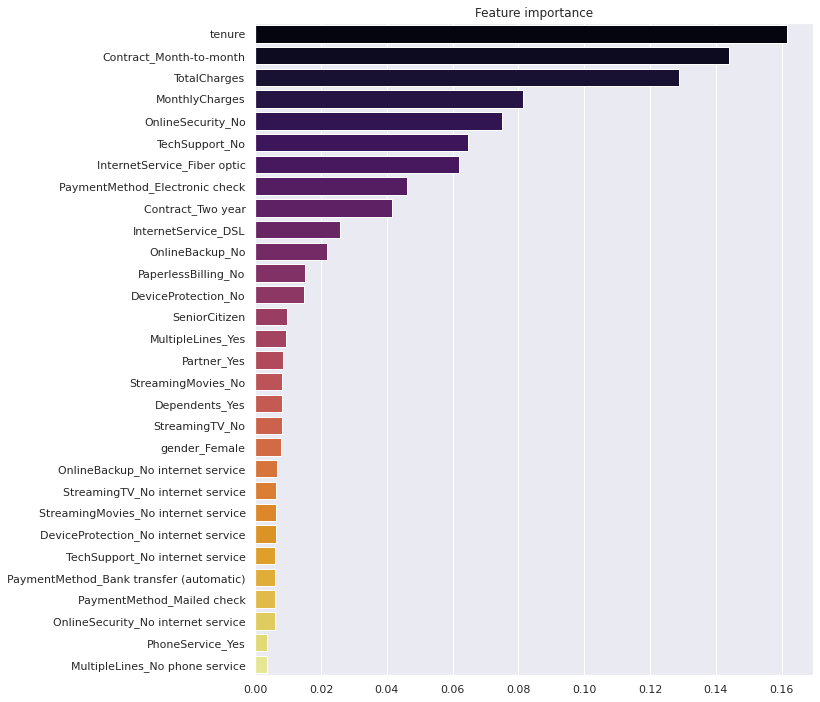

In [42]:
from sklearn.ensemble import RandomForestClassifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
x, y = dft.drop(["Churn_Yes"],axis=1), dft['Churn_Yes']

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="inferno", orient='h')

#.feature_importances_

**The importances validate the previous analysis. All three numerical characteristics are good predictors of churn, especially tern. As we have seen, fiber optic customers are very likely to drop out, while those with long-term contracts do not. On the other hand, gender and streaming are not important characteristics and it might be interesting to remove additional services labeled 'No internet service', as they are highly correlated.**

In [43]:
dft.drop(["MultipleLines_No phone service","OnlineSecurity_No internet service","OnlineBackup_No internet service","DeviceProtection_No internet service","TechSupport_No internet service","StreamingMovies_No internet service","StreamingTV_No internet service"],axis=1, inplace=True)

In [44]:
dft.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,...,TechSupport_No,StreamingTV_No,StreamingMovies_No,Contract_Month-to-month,Contract_Two year,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,1,0,0,0,1,...,1,1,1,1,0,0,0,1,0,0
1,0,34,56.95,1889.50,0,0,0,1,0,1,...,1,1,1,0,0,1,0,0,1,0
2,0,2,53.85,108.15,0,0,0,1,0,1,...,1,1,1,1,0,0,0,0,1,1
3,0,45,42.30,1840.75,0,0,0,0,0,1,...,0,1,1,0,0,1,1,0,0,0
4,0,2,70.70,151.65,1,0,0,1,0,0,...,1,1,1,1,0,0,0,1,0,1


<AxesSubplot:>

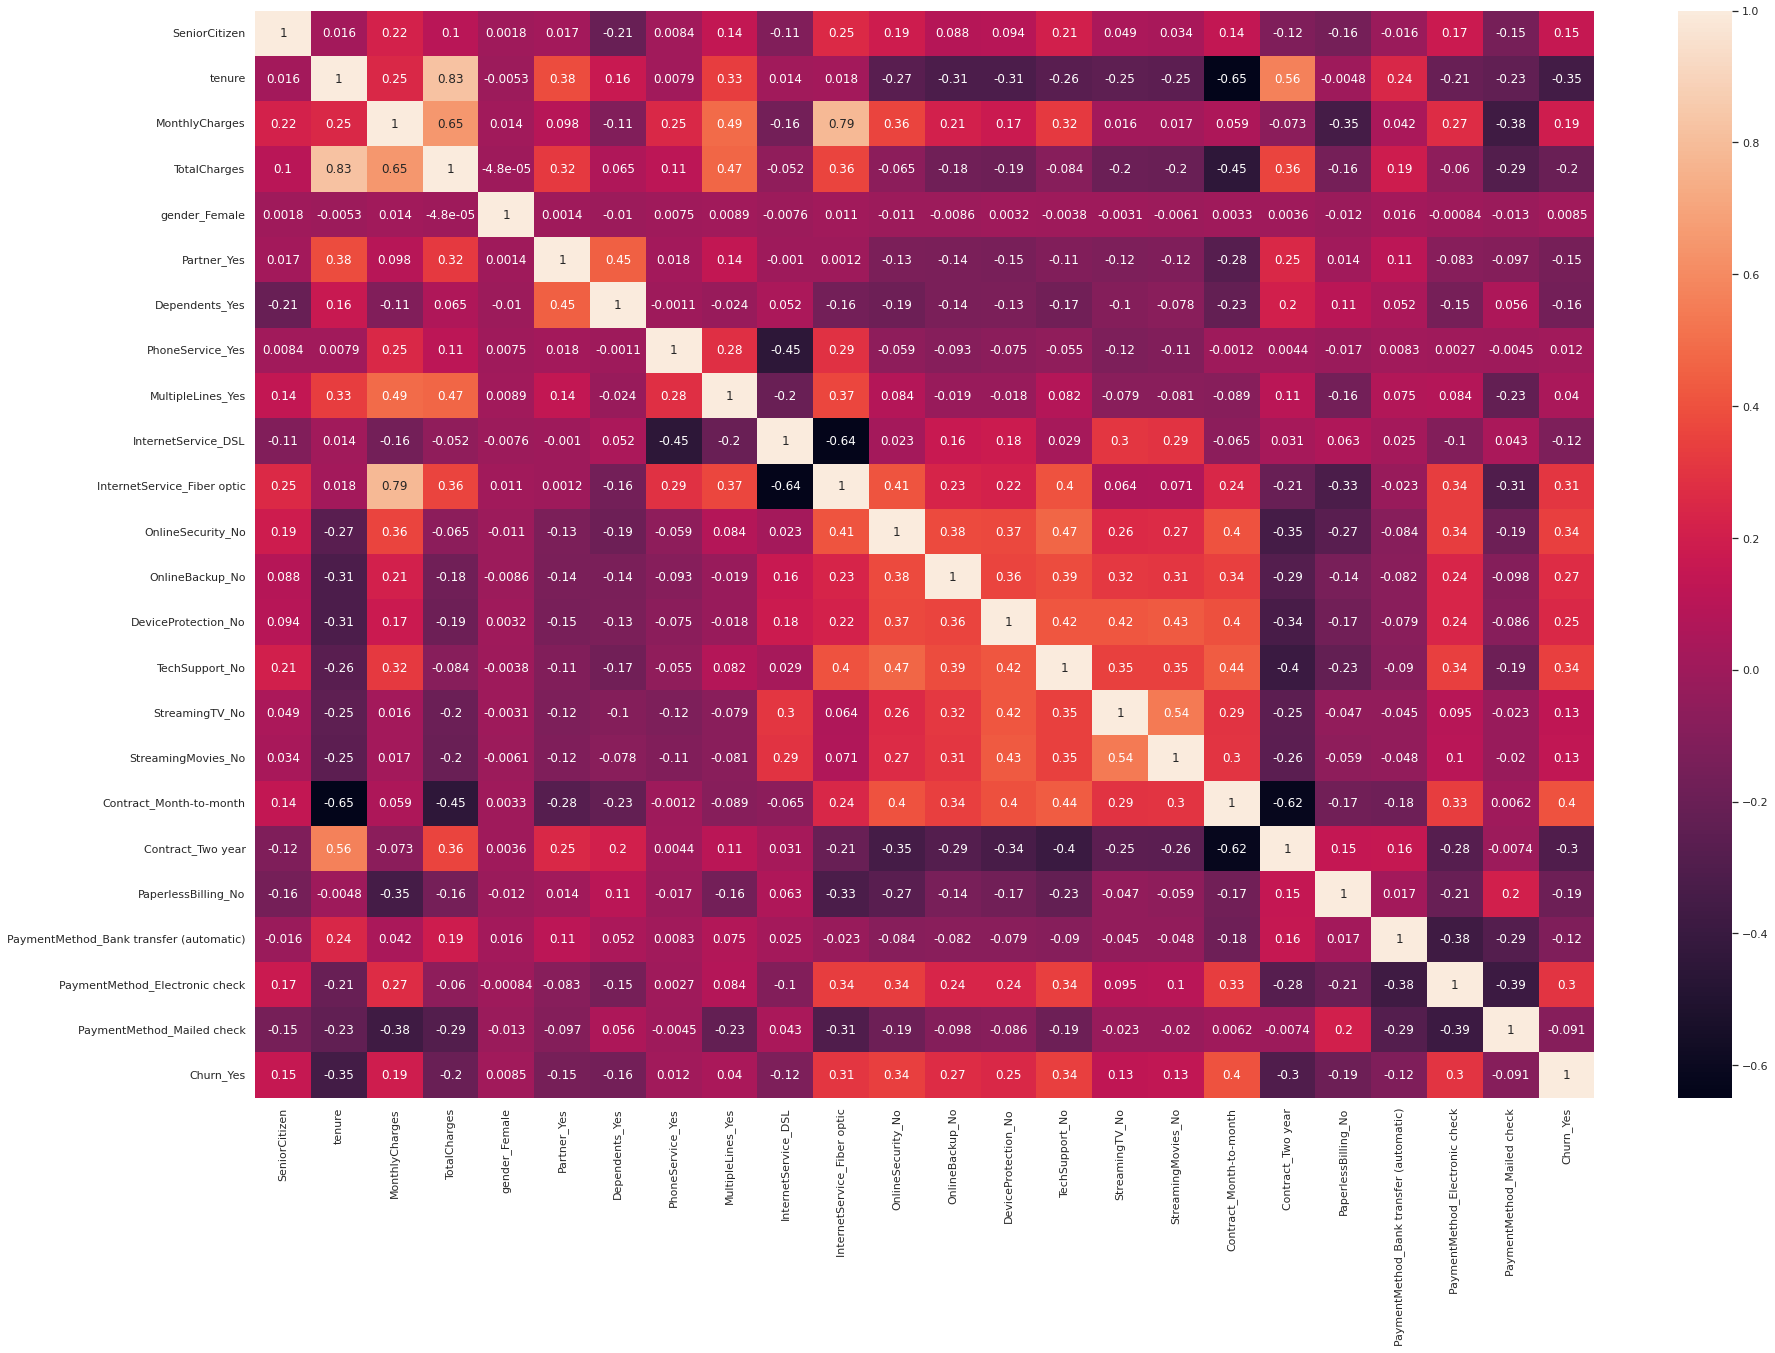

In [45]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(dft.corr(),annot=True)

# **Model**

In [56]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

seed=333
lr = LogisticRegression(solver='liblinear')
svc = SVC() 
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
gb=GradientBoostingClassifier()
abc=AdaBoostClassifier()

In [57]:
X= dft[["tenure","Contract_Month-to-month","TotalCharges","MonthlyCharges","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","PaymentMethod_Electronic check"]]
Y= dft.Churn_Yes

X.head()

,tenure,Contract_Month-to-month,TotalCharges,MonthlyCharges,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check
0,1,1,29.85,29.85,1,1,0,1
1,34,0,1889.50,56.95,0,1,0,0
2,2,1,108.15,53.85,0,1,0,0
3,45,0,1840.75,42.30,0,0,0,0
4,2,1,151.65,70.70,1,1,1,1


In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [63]:
#Por defecto el metodo score retorna el coeficiente de determinacion R^2
def entrenar(model):
    model.fit(X_train, y_train)
    return (model.score(X_train, y_train),model.score(X_test, y_test))
    #return model.score(X_test, y_test)

#Entrenamos
modelos = {'LogisticRegression': lr,
          'KNeighborsClassifier': knn,
          'SVC': svc,
          'RandomForestClassifier': rf,
          'XGBClassifier': xgb,
          'GradientBoostingClassifier': gb,
          'AdaBoostClassifier': abc}
scores={}
train_scores={}
for nombre, modelo in modelos.items():
    scores[nombre]=entrenar(modelo)[1]
    train_scores[nombre]=entrenar(modelo)[0]

scores.items()

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:11:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


dict_items([('LogisticRegression', 0.7825159914712153), ('KNeighborsClassifier', 0.759772565742715), ('SVC', 0.7114427860696517), ('RandomForestClassifier', 0.7690120824449183), ('XGBClassifier', 0.767590618336887), ('GradientBoostingClassifier', 0.7867803837953091), ('AdaBoostClassifier', 0.7874911158493249)])

In [64]:
scores = pd.DataFrame(scores,index=['Score']).transpose()
scores = scores.sort_values('Score')

train_scores = pd.DataFrame(train_scores,index=['Train Score']).transpose()
train_scores = train_scores.sort_values('Train Score')


In [65]:
cm = sns.color_palette('flare',as_cmap=True)
scores = scores.style.background_gradient(cmap=cm)
scores

,Score
SVC,0.711443
KNeighborsClassifier,0.759773
XGBClassifier,0.767591
RandomForestClassifier,0.769012
LogisticRegression,0.782516
GradientBoostingClassifier,0.786780
AdaBoostClassifier,0.787491


In [66]:
train_scores.style.background_gradient(cmap=cm)

,Train Score
SVC,0.739911
LogisticRegression,0.802311
AdaBoostClassifier,0.806578
GradientBoostingClassifier,0.824711
KNeighborsClassifier,0.832178
XGBClassifier,0.916089
RandomForestClassifier,0.992711
